# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [2]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
df_raw = pd.read_csv('housing.csv')

In [5]:
# Verificar valores nulos
print(df_raw.isnull().sum())
print('-')

# Remover valores ausentes
df = df_raw.dropna()
print(df.isnull().sum())
print('-')

# Verificar tipos de dados
print(df.dtypes)
print('-')

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
-
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
-
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
-


In [6]:
# Converter o valores da coluna ocean_proximity
conversao_numerica = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}

df['ocean_proximity'] = df['ocean_proximity'].map(conversao_numerica)
print(df['ocean_proximity'].unique())

[0 1 2 3 4]


C:\Users\Felipe\AppData\Local\Temp\ipykernel_572\2201549540.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'] = df['ocean_proximity'].map(conversao_numerica)


In [7]:
# Verificar dataframe
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

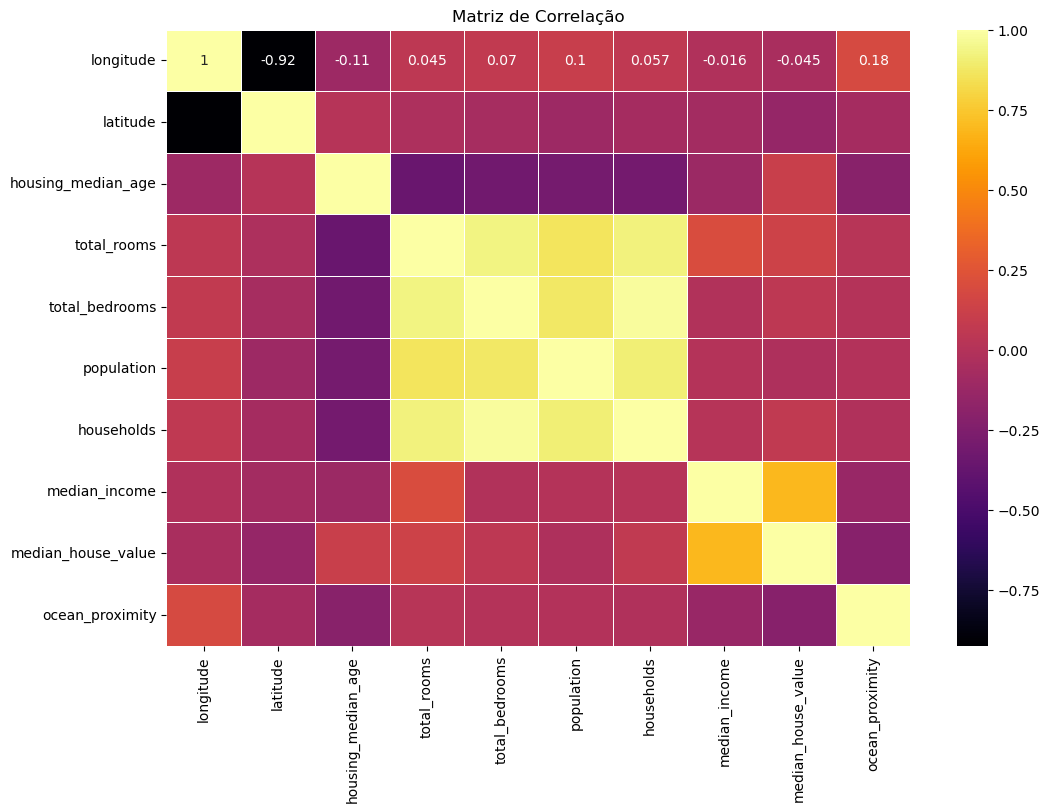

In [14]:
# Calcular e visualizar a matriz de correlação  
matriz_cor = df.corr()

# Plotar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(matriz_cor, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [18]:
# Visualizando a estrutura da correlação
matriz_cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000


### 3. Separe os dados em validação e teste

In [20]:
# Dividir os dados em treino e teste

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [23]:
# Configurando as arvores
regr_8 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2) 

# Treinando os modelos
regr_8.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [26]:
# Fazer previsões
mse1 = regr_8.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_8.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=8 é: 0,77
O MSE da árvore com profundidade=2 é: 0,45


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

R: A arvore de profundidade 2 tem menos camadas de decisão e um MSE melhor do que a arvore de profundidade 8. Provavelmente a arvore de profundidade 8 está sofrendo overfitting pois deve estar capturando ruidos nos dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

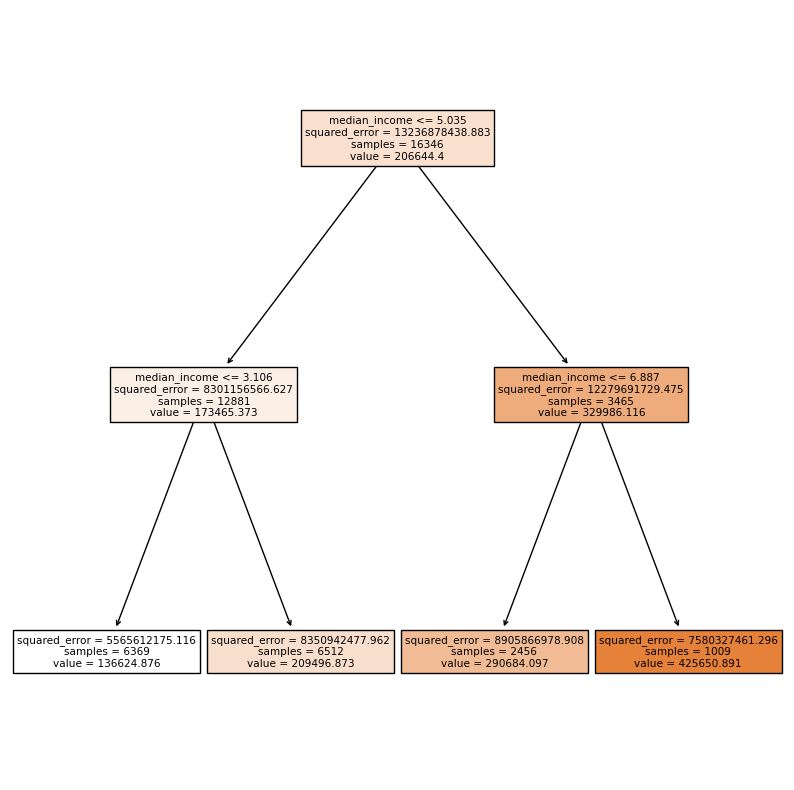

In [28]:
# Visualizando a arvore
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,  
                    filled=True) 

R: A variável predita 'median_income' é a mais importante agora, pois é apartir dela que iremos prever os resultados dos futuros dados!